In [1]:
%matplotlib inline
from backtesting import Strategy
from backtesting.lib import crossover
from backtesting import Backtest
import pandas as pd
from backtesting.test import SMA
import pandas as pd
from bokeh.io import export_png
import matplotlib.pyplot as plt

/Users/fahad/anaconda3/lib/python3.7/site-packages/backtesting/_plotting.py:34: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `bokeh.io.reset_output()`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

In [2]:
from backtesting.lib import SignalStrategy, TrailingStrategy
from backtesting import Position



In [3]:
PFE = pd.read_csv("/Users/fahad/project_repo/data/final/Moving_Average_Preparation/PFE_MA_prep.csv", index_col=0)

In [4]:
PFE.Date = pd.to_datetime(PFE.Date, format="%Y-%m-%d")

In [5]:
PFE = PFE.set_index(PFE['Date'])

In [6]:
# PFE = PFE.drop("Date", axis=1)


In [7]:
PFE.head()

,Open,High,Low,Close,Volume,Date
Date,,,,,,
2019-08-15,34.3000,34.3768,33.97,34.105,8584769,2019-08-15
2019-08-14,34.9305,34.9800,34.20,34.240,36567800,2019-08-14
2019-08-13,35.4300,35.8100,35.15,35.200,43215800,2019-08-13
2019-08-12,36.3100,36.3200,34.78,35.390,41117300,2019-08-12
2019-08-09,36.7700,36.8300,36.11,36.350,24090800,2019-08-09


In [8]:
plt.style.use('ggplot')

In [9]:
PFE.index

DatetimeIndex(['2019-08-15', '2019-08-14', '2019-08-13', '2019-08-12',
               '2019-08-09', '2019-08-08', '2019-08-07', '2019-08-06',
               '2019-08-05', '2019-08-02',
               ...
               '2010-01-15', '2010-01-14', '2010-01-13', '2010-01-12',
               '2010-01-11', '2010-01-08', '2010-01-07', '2010-01-06',
               '2010-01-05', '2010-01-04'],
              dtype='datetime64[ns]', name='Date', length=2421, freq=None)

/Users/fahad/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


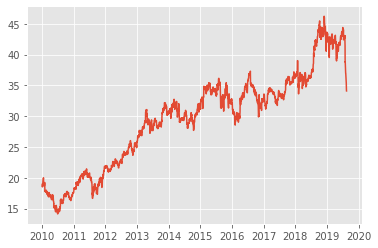

In [10]:
plt.plot(PFE.index,PFE.Close)


In [11]:
PFE = PFE[::-1]

In [12]:
#dictionary to store equity
equity_dict = dict()

In [13]:
class SmaCrossTrailing(TrailingStrategy):
            
    n1 = 50
    n2 = 200
    
    def init(self):
        self.sma1 = self.I(SMA, self.data.Close, self.n1)
        self.sma2 = self.I(SMA, self.data.Close, self.n2)
        self.set_trailing_sl(4)
        
    def next(self):
        super().init()
        equity_dict[self.data.index[-1]] = TrailingStrategy.equity.__get__(self)
        
        position = Strategy.position.__get__(self)
        
        if crossover(self.sma1, self.sma2) and (position.is_long!=True):
            
            #print (position.is_long)
                        
            
            self.buy()
        else:
            pass
#         elif crossover(self.sma2, self.sma1):
            
#             self.sell()
                        
        

            
#     def next(self):
#         #super().next()
#                 # If sma1 crosses above sma2, buy the asset
#         if crossover(self.sma1, self.sma2):
#             #print (Strategy.equity.__get__(self))
#             #print (self.data.index[-1])
#             equity_dict[self.data.index[-1]] = Strategy.equity.__get__(self)
#             self.buy()

#         # Else, if sma1 crosses below sma2, sell it
#         elif crossover(self.sma2, self.sma1):
#             #print (Strategy.equity.__get__(self))
#             #print (self.data.index[-1])
#             equity_dict[self.data.index[-1]] = Strategy.equity.__get__(self)
#             self.sell()
            

        
        

In [14]:
bt = Backtest(PFE, SmaCrossTrailing, cash=10000, commission=.01)

bt.run()

Start                     2010-01-04 00:00:00
End                       2019-08-15 00:00:00
Duration                   3510 days 00:00:00
Exposure [%]                                0
Equity Final [$]                      15845.8
Equity Peak [$]                       21479.2
Return [%]                            58.4577
Buy & Hold Return [%]                 80.1638
Max. Drawdown [%]                    -26.2276
Avg. Drawdown [%]                     -3.0975
Max. Drawdown Duration      543 days 00:00:00
Avg. Drawdown Duration       42 days 00:00:00
# Trades                                    0
Win Rate [%]                              NaN
Best Trade [%]                            NaN
Worst Trade [%]                           NaN
Avg. Trade [%]                            NaN
Max. Trade Duration                       NaT
Avg. Trade Duration                       NaT
Expectancy [%]                            NaN
SQN                                       NaN
Sharpe Ratio                      

In [15]:
bt.plot()

In [16]:
df = pd.DataFrame.from_dict([equity_dict])

In [17]:
df = df.T

In [18]:
df.columns = ['Equity']

In [19]:
export = df.to_csv("/Users/fahad/project_repo/data/final/Equity/PFE_Moving_Average_Equity.csv")

In [20]:
df

,Equity
2010-10-19,10000.000000
2010-10-20,10000.000000
2010-10-21,10000.000000
2010-10-22,10000.000000
2010-10-25,10000.000000
2010-10-26,10000.000000
2010-10-27,10000.000000
2010-10-28,10000.000000
2010-10-29,10000.000000
2010-11-01,10000.000000


In [ ]:
class SmaCross(Strategy):
    
    # Define the two MA lags as *class variables*
    # for later optimization
    n1 = 10
    n2 = 20
    
    def init(self):
        # Precompute two moving averages
        self.sma1 = self.I(SMA, self.data.Close, self.n1)
        self.sma2 = self.I(SMA, self.data.Close, self.n2)
#         print (self.sma1)
#         print (self.sma2)
    
    def next(self):
        # If sma1 crosses above sma2, buy the asset
        if crossover(self.sma1, self.sma2):
            #print (Strategy.equity.__get__(self))
            #print (self.data.index[-1])
            equity_dict[self.data.index[-1]] = Strategy.equity.__get__(self)
            self.buy()

        # Else, if sma1 crosses below sma2, sell it
        elif crossover(self.sma2, self.sma1):
            #print (Strategy.equity.__get__(self))
            #print (self.data.index[-1])
            equity_dict[self.data.index[-1]] = Strategy.equity.__get__(self)
            self.sell()